In [ ]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)
print("Train data shape: {0}".format(train_data.data.shape))

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))

In [1]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1

NameError: name 'np' is not defined

In [5]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))




100%|██████████| 16992/16992 [00:01<00:00, 15823.32it/s]

Train data length: 13100
Test data length: 1488
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 19


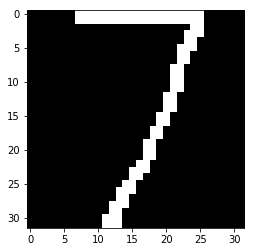

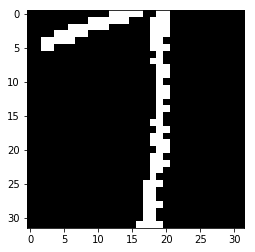

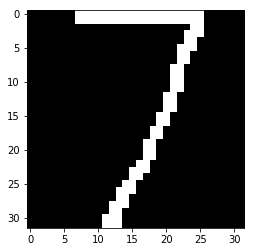

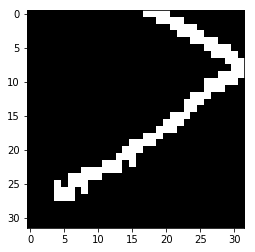

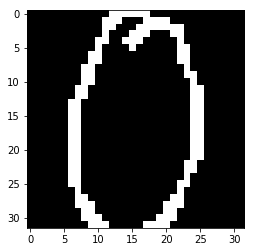

In [6]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(hasy_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()

In [7]:
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
hasy_model.train()

epochs = 30
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.0001, momentum=0.7)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)
    
for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = hasy_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 100 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model-03.ckpt')        
           

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = hasy_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 0



  0%|          | 1/819 [00:01<16:59,  1.25s/it]

Loss: 2.930697202682495



 12%|█▏        | 101/819 [02:23<16:28,  1.38s/it]

Loss: 2.7894389629364014



 25%|██▍       | 201/819 [04:42<12:53,  1.25s/it]

Loss: 2.6902029514312744



 37%|███▋      | 301/819 [06:50<12:12,  1.41s/it]

Loss: 2.562800645828247



 49%|████▉     | 401/819 [09:02<08:51,  1.27s/it]

Loss: 2.6837661266326904



 61%|██████    | 501/819 [11:12<07:32,  1.42s/it]

Loss: 2.70517635345459



 73%|███████▎  | 601/819 [13:28<04:47,  1.32s/it]

Loss: 2.6059491634368896



 86%|████████▌ | 701/819 [15:50<02:56,  1.49s/it]

Loss: 2.655095100402832



 98%|█████████▊| 801/819 [18:07<00:23,  1.32s/it]

Loss: 2.4405555725097656



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 1



  0%|          | 1/819 [00:01<15:38,  1.15s/it]

Loss: 2.4714794158935547



 12%|█▏        | 101/819 [02:27<16:14,  1.36s/it]

Loss: 2.5128262042999268



 25%|██▍       | 201/819 [04:37<13:06,  1.27s/it]

Loss: 2.7168185710906982



 37%|███▋      | 301/819 [07:01<11:20,  1.31s/it]

Loss: 2.599241018295288



 49%|████▉     | 401/819 [09:08<09:14,  1.33s/it]

Loss: 2.5146281719207764



 61%|██████    | 501/819 [11:18<06:57,  1.31s/it]

Loss: 2.373281955718994



 73%|███████▎  | 601/819 [12:54<02:37,  1.38it/s]

Loss: 2.544642925262451



 86%|████████▌ | 701/819 [14:05<01:24,  1.39it/s]

Loss: 2.700106620788574



 98%|█████████▊| 801/819 [15:17<00:12,  1.41it/s]

Loss: 2.4050910472869873



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 2



  0%|          | 1/819 [00:00<08:54,  1.53it/s]

Loss: 2.429044485092163



 12%|█▏        | 101/819 [01:11<08:37,  1.39it/s]

Loss: 2.569108486175537



 25%|██▍       | 201/819 [02:23<07:27,  1.38it/s]

Loss: 2.472278594970703



 37%|███▋      | 301/819 [03:34<06:01,  1.43it/s]

Loss: 2.5455150604248047



 49%|████▉     | 401/819 [04:45<05:02,  1.38it/s]

Loss: 2.438706159591675



 61%|██████    | 501/819 [05:56<03:50,  1.38it/s]

Loss: 2.5032825469970703



 73%|███████▎  | 601/819 [07:05<02:15,  1.61it/s]

Loss: 2.582897186279297



 86%|████████▌ | 701/819 [08:07<01:14,  1.58it/s]

Loss: 2.587339401245117



 98%|█████████▊| 801/819 [09:09<00:11,  1.62it/s]

Loss: 2.4886057376861572



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 3



  0%|          | 1/819 [00:00<08:33,  1.59it/s]

Loss: 2.3255231380462646



 12%|█▏        | 101/819 [01:02<07:29,  1.60it/s]

Loss: 2.521364450454712



 25%|██▍       | 201/819 [02:04<06:22,  1.62it/s]

Loss: 2.5781164169311523



 37%|███▋      | 301/819 [03:06<05:22,  1.61it/s]

Loss: 2.516489267349243



 49%|████▉     | 401/819 [04:08<04:17,  1.62it/s]

Loss: 2.380383014678955



 61%|██████    | 501/819 [05:10<03:18,  1.60it/s]

Loss: 2.4791388511657715



 73%|███████▎  | 601/819 [06:11<02:14,  1.63it/s]

Loss: 2.4406962394714355



 86%|████████▌ | 701/819 [07:14<01:13,  1.60it/s]

Loss: 2.339205026626587



 98%|█████████▊| 801/819 [08:16<00:11,  1.62it/s]

Loss: 2.5345630645751953



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 4



  0%|          | 1/819 [00:00<08:48,  1.55it/s]

Loss: 2.4358651638031006



 12%|█▏        | 101/819 [01:02<07:29,  1.60it/s]

Loss: 2.4626338481903076



 25%|██▍       | 201/819 [02:04<06:18,  1.63it/s]

Loss: 2.3118999004364014



 37%|███▋      | 301/819 [03:06<05:20,  1.62it/s]

Loss: 2.416506290435791



 49%|████▉     | 401/819 [04:08<04:17,  1.63it/s]

Loss: 2.3662285804748535



 61%|██████    | 501/819 [05:09<03:17,  1.61it/s]

Loss: 2.534327745437622



 73%|███████▎  | 601/819 [06:12<02:15,  1.61it/s]

Loss: 2.2964181900024414



 86%|████████▌ | 701/819 [07:14<01:14,  1.59it/s]

Loss: 2.6542716026306152



 98%|█████████▊| 801/819 [08:16<00:11,  1.61it/s]

Loss: 2.368208885192871



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 5



  0%|          | 1/819 [00:00<08:15,  1.65it/s]

Loss: 2.3013956546783447



 12%|█▏        | 101/819 [01:02<07:28,  1.60it/s]

Loss: 2.483095645904541



 25%|██▍       | 201/819 [02:04<06:24,  1.61it/s]

Loss: 2.4106979370117188



 37%|███▋      | 301/819 [03:06<05:21,  1.61it/s]

Loss: 2.2892508506774902



 49%|████▉     | 401/819 [04:08<04:19,  1.61it/s]

Loss: 2.5518040657043457



 61%|██████    | 501/819 [05:10<03:14,  1.63it/s]

Loss: 2.443075180053711



 73%|███████▎  | 601/819 [06:12<02:16,  1.60it/s]

Loss: 2.592237949371338



 86%|████████▌ | 701/819 [07:14<01:12,  1.62it/s]

Loss: 2.5773253440856934



 98%|█████████▊| 801/819 [08:16<00:11,  1.60it/s]

Loss: 2.3991506099700928



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 6



  0%|          | 1/819 [00:00<08:08,  1.67it/s]

Loss: 2.430060386657715



 12%|█▏        | 101/819 [01:02<07:26,  1.61it/s]

Loss: 2.3742804527282715



 25%|██▍       | 201/819 [02:04<06:21,  1.62it/s]

Loss: 2.5664749145507812



 37%|███▋      | 301/819 [03:06<05:18,  1.62it/s]

Loss: 2.5358078479766846



 49%|████▉     | 401/819 [04:08<04:19,  1.61it/s]

Loss: 2.447045087814331



 61%|██████    | 501/819 [05:09<03:17,  1.61it/s]

Loss: 2.549402952194214



 73%|███████▎  | 601/819 [06:12<02:16,  1.59it/s]

Loss: 2.264143943786621



 86%|████████▌ | 701/819 [07:14<01:12,  1.63it/s]

Loss: 2.3813791275024414



 98%|█████████▊| 801/819 [08:16<00:11,  1.61it/s]

Loss: 2.4978394508361816



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 7



  0%|          | 1/819 [00:00<08:38,  1.58it/s]

Loss: 2.500039577484131



 12%|█▏        | 101/819 [01:02<07:24,  1.61it/s]

Loss: 2.3594093322753906



 25%|██▍       | 201/819 [02:04<06:20,  1.62it/s]

Loss: 2.4390082359313965



 37%|███▋      | 301/819 [03:06<05:20,  1.62it/s]

Loss: 2.31461501121521



 49%|████▉     | 401/819 [04:08<04:16,  1.63it/s]

Loss: 2.431577682495117



 61%|██████    | 501/819 [05:10<03:17,  1.61it/s]

Loss: 2.2249908447265625



 73%|███████▎  | 601/819 [06:12<02:14,  1.63it/s]

Loss: 2.4377808570861816



 86%|████████▌ | 701/819 [07:14<01:13,  1.60it/s]

Loss: 2.335527181625366



 98%|█████████▊| 801/819 [08:17<00:11,  1.62it/s]

Loss: 2.533895492553711



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 8



  0%|          | 1/819 [00:00<08:21,  1.63it/s]

Loss: 2.5379836559295654



 12%|█▏        | 101/819 [01:02<07:22,  1.62it/s]

Loss: 2.4262287616729736



 25%|██▍       | 201/819 [02:04<06:18,  1.63it/s]

Loss: 2.525244951248169



 37%|███▋      | 301/819 [03:06<05:16,  1.63it/s]

Loss: 2.484957456588745



 49%|████▉     | 401/819 [04:08<04:15,  1.63it/s]

Loss: 2.523512840270996



 61%|██████    | 501/819 [05:10<03:14,  1.64it/s]

Loss: 2.2726798057556152



 73%|███████▎  | 601/819 [06:13<02:14,  1.63it/s]

Loss: 2.428915023803711



 86%|████████▌ | 701/819 [07:15<01:13,  1.60it/s]

Loss: 2.394538402557373



 98%|█████████▊| 801/819 [08:17<00:11,  1.58it/s]

Loss: 2.32433819770813



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 9



  0%|          | 1/819 [00:00<08:30,  1.60it/s]

Loss: 2.317450761795044



 12%|█▏        | 101/819 [01:02<07:19,  1.63it/s]

Loss: 2.3870491981506348



 25%|██▍       | 201/819 [02:04<06:19,  1.63it/s]

Loss: 2.2940173149108887



 37%|███▋      | 301/819 [03:06<05:22,  1.61it/s]

Loss: 2.262660503387451



 49%|████▉     | 401/819 [04:09<04:18,  1.62it/s]

Loss: 2.39849591255188



 61%|██████    | 501/819 [05:10<03:18,  1.60it/s]

Loss: 2.5011723041534424



 73%|███████▎  | 601/819 [06:13<02:15,  1.61it/s]

Loss: 2.4855942726135254



 86%|████████▌ | 701/819 [07:15<01:13,  1.61it/s]

Loss: 2.288536310195923



 98%|█████████▊| 801/819 [08:16<00:11,  1.60it/s]

Loss: 2.2617154121398926



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 10



  0%|          | 1/819 [00:00<08:16,  1.65it/s]

Loss: 2.3208773136138916



 12%|█▏        | 101/819 [01:02<07:23,  1.62it/s]

Loss: 2.4418210983276367



 25%|██▍       | 201/819 [02:05<06:21,  1.62it/s]

Loss: 2.5459446907043457



 37%|███▋      | 301/819 [03:07<05:20,  1.62it/s]

Loss: 2.3994603157043457



 49%|████▉     | 401/819 [04:09<04:20,  1.60it/s]

Loss: 2.5377302169799805



 61%|██████    | 501/819 [05:11<03:17,  1.61it/s]

Loss: 2.4004058837890625



 73%|███████▎  | 601/819 [06:13<02:14,  1.62it/s]

Loss: 2.3419179916381836



 86%|████████▌ | 701/819 [07:15<01:12,  1.63it/s]

Loss: 2.4174790382385254



 98%|█████████▊| 801/819 [08:17<00:11,  1.61it/s]

Loss: 2.4333724975585938



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 11



  0%|          | 1/819 [00:00<08:10,  1.67it/s]

Loss: 2.43593692779541



 12%|█▏        | 101/819 [01:02<07:46,  1.54it/s]

Loss: 2.3452765941619873



 25%|██▍       | 201/819 [02:04<06:23,  1.61it/s]

Loss: 2.3481791019439697



 37%|███▋      | 301/819 [03:07<05:22,  1.60it/s]

Loss: 2.3672990798950195



 49%|████▉     | 401/819 [04:09<04:16,  1.63it/s]

Loss: 2.4467978477478027



 61%|██████    | 501/819 [05:11<03:16,  1.62it/s]

Loss: 2.384359121322632



 73%|███████▎  | 601/819 [06:13<02:13,  1.63it/s]

Loss: 2.3820090293884277



 86%|████████▌ | 701/819 [07:15<01:12,  1.63it/s]

Loss: 2.240844488143921



 98%|█████████▊| 801/819 [08:18<00:11,  1.62it/s]

Loss: 2.4834067821502686



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 12



  0%|          | 1/819 [00:00<08:13,  1.66it/s]

Loss: 2.3649144172668457



 12%|█▏        | 101/819 [01:03<07:33,  1.58it/s]

Loss: 2.5753955841064453



 25%|██▍       | 201/819 [02:05<06:22,  1.61it/s]

Loss: 2.346240997314453



 37%|███▋      | 301/819 [03:07<05:25,  1.59it/s]

Loss: 2.3388631343841553



 49%|████▉     | 401/819 [04:09<04:22,  1.59it/s]

Loss: 2.4052412509918213



 61%|██████    | 501/819 [05:11<03:15,  1.63it/s]

Loss: 2.3717401027679443



 73%|███████▎  | 601/819 [06:14<02:17,  1.59it/s]

Loss: 2.3184802532196045



 86%|████████▌ | 701/819 [07:16<01:14,  1.59it/s]

Loss: 2.4968061447143555



 98%|█████████▊| 801/819 [08:18<00:11,  1.62it/s]

Loss: 2.4463934898376465



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 13



  0%|          | 1/819 [00:00<08:14,  1.65it/s]

Loss: 2.428873062133789



 12%|█▏        | 101/819 [01:02<07:25,  1.61it/s]

Loss: 2.265526294708252



 25%|██▍       | 201/819 [02:05<06:31,  1.58it/s]

Loss: 2.392637014389038



 37%|███▋      | 301/819 [03:07<05:25,  1.59it/s]

Loss: 2.3297760486602783



 49%|████▉     | 401/819 [04:09<04:20,  1.60it/s]

Loss: 2.2896435260772705



 61%|██████    | 501/819 [05:12<03:15,  1.62it/s]

Loss: 2.421001434326172



 73%|███████▎  | 601/819 [06:14<02:15,  1.61it/s]

Loss: 2.3566229343414307



 86%|████████▌ | 701/819 [07:16<01:12,  1.63it/s]

Loss: 2.4885995388031006



 98%|█████████▊| 801/819 [08:18<00:11,  1.59it/s]

Loss: 2.3183131217956543



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 14



  0%|          | 1/819 [00:00<08:24,  1.62it/s]

Loss: 2.4063594341278076



 12%|█▏        | 101/819 [01:02<07:22,  1.62it/s]

Loss: 2.4962759017944336



 25%|██▍       | 201/819 [02:04<06:24,  1.61it/s]

Loss: 2.5513875484466553



 37%|███▋      | 301/819 [03:06<05:24,  1.59it/s]

Loss: 2.503620147705078



 49%|████▉     | 401/819 [04:09<04:17,  1.62it/s]

Loss: 2.510056495666504



 61%|██████    | 501/819 [05:11<03:17,  1.61it/s]

Loss: 2.4445674419403076



 73%|███████▎  | 601/819 [06:13<02:16,  1.60it/s]

Loss: 2.5822393894195557



 86%|████████▌ | 701/819 [07:15<01:13,  1.60it/s]

Loss: 2.306952714920044



 98%|█████████▊| 801/819 [08:17<00:11,  1.60it/s]

Loss: 2.303130626678467



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 15



  0%|          | 1/819 [00:00<08:32,  1.59it/s]

Loss: 2.4901981353759766



 12%|█▏        | 101/819 [01:02<07:21,  1.63it/s]

Loss: 2.4090278148651123



 25%|██▍       | 201/819 [02:04<06:29,  1.59it/s]

Loss: 2.4817252159118652



 37%|███▋      | 301/819 [03:06<05:24,  1.60it/s]

Loss: 2.676069736480713



 49%|████▉     | 401/819 [04:08<04:22,  1.59it/s]

Loss: 2.3279647827148438



 61%|██████    | 501/819 [05:11<03:20,  1.59it/s]

Loss: 2.444345474243164



 73%|███████▎  | 601/819 [06:13<02:16,  1.60it/s]

Loss: 2.4835615158081055



 86%|████████▌ | 701/819 [07:15<01:12,  1.62it/s]

Loss: 2.272773265838623



 98%|█████████▊| 801/819 [08:17<00:11,  1.59it/s]

Loss: 2.4158153533935547



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 16



  0%|          | 1/819 [00:00<08:29,  1.61it/s]

Loss: 2.4163107872009277



 12%|█▏        | 101/819 [01:03<07:34,  1.58it/s]

Loss: 2.4931068420410156



 25%|██▍       | 201/819 [02:05<06:18,  1.63it/s]

Loss: 2.403470516204834



 37%|███▋      | 301/819 [03:07<05:26,  1.59it/s]

Loss: 2.4984042644500732



 49%|████▉     | 401/819 [04:09<04:22,  1.59it/s]

Loss: 2.389747142791748



 61%|██████    | 501/819 [05:11<03:16,  1.62it/s]

Loss: 2.5041937828063965



 73%|███████▎  | 601/819 [06:13<02:15,  1.61it/s]

Loss: 2.4369168281555176



 86%|████████▌ | 701/819 [07:16<01:14,  1.59it/s]

Loss: 2.5037972927093506



 98%|█████████▊| 801/819 [08:18<00:11,  1.61it/s]

Loss: 2.4153075218200684



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 17



  0%|          | 1/819 [00:00<08:33,  1.59it/s]

Loss: 2.4082601070404053



 12%|█▏        | 101/819 [01:02<07:25,  1.61it/s]

Loss: 2.3703103065490723



 25%|██▍       | 201/819 [02:04<06:20,  1.63it/s]

Loss: 2.705690622329712



 37%|███▋      | 301/819 [03:07<05:27,  1.58it/s]

Loss: 2.410444736480713



 49%|████▉     | 401/819 [04:09<04:23,  1.59it/s]

Loss: 2.379486560821533



 61%|██████    | 501/819 [05:11<03:14,  1.64it/s]

Loss: 2.497454881668091



 73%|███████▎  | 601/819 [06:13<02:16,  1.60it/s]

Loss: 2.500969171524048



 86%|████████▌ | 701/819 [07:16<01:14,  1.59it/s]

Loss: 2.314805269241333



 98%|█████████▊| 801/819 [08:18<00:11,  1.61it/s]

Loss: 2.6146156787872314



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 18



  0%|          | 1/819 [00:00<08:37,  1.58it/s]

Loss: 2.5011117458343506



 12%|█▏        | 101/819 [01:02<07:23,  1.62it/s]

Loss: 2.4802234172821045



 25%|██▍       | 201/819 [02:04<06:22,  1.62it/s]

Loss: 2.497830867767334



 37%|███▋      | 301/819 [03:06<05:28,  1.57it/s]

Loss: 2.3090555667877197



 49%|████▉     | 401/819 [04:09<04:16,  1.63it/s]

Loss: 2.4609782695770264



 61%|██████    | 501/819 [05:11<03:14,  1.63it/s]

Loss: 2.459731340408325



 73%|███████▎  | 601/819 [06:13<02:17,  1.59it/s]

Loss: 2.38238263130188



 86%|████████▌ | 701/819 [07:15<01:13,  1.61it/s]

Loss: 2.5002570152282715



 98%|█████████▊| 801/819 [08:17<00:11,  1.61it/s]

Loss: 2.470999002456665



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 19



  0%|          | 1/819 [00:00<08:11,  1.66it/s]

Loss: 2.3468897342681885



 12%|█▏        | 101/819 [01:02<07:22,  1.62it/s]

Loss: 2.369837760925293



 25%|██▍       | 201/819 [02:05<06:26,  1.60it/s]

Loss: 2.231614112854004



 37%|███▋      | 301/819 [03:07<05:20,  1.62it/s]

Loss: 2.340019464492798



 49%|████▉     | 401/819 [04:10<04:24,  1.58it/s]

Loss: 2.3805410861968994



 61%|██████    | 501/819 [05:12<03:23,  1.56it/s]

Loss: 2.4735119342803955



 73%|███████▎  | 601/819 [06:14<02:16,  1.60it/s]

Loss: 2.4576332569122314



 86%|████████▌ | 701/819 [07:17<01:14,  1.59it/s]

Loss: 2.471444606781006



 98%|█████████▊| 801/819 [08:19<00:11,  1.62it/s]

Loss: 2.446221351623535



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 20



  0%|          | 1/819 [00:00<08:53,  1.53it/s]

Loss: 2.3520898818969727



 12%|█▏        | 101/819 [01:02<07:27,  1.60it/s]

Loss: 2.4183547496795654



 25%|██▍       | 201/819 [02:04<06:19,  1.63it/s]

Loss: 2.281909465789795



 37%|███▋      | 301/819 [03:06<05:17,  1.63it/s]

Loss: 2.4008920192718506



 49%|████▉     | 401/819 [04:09<04:17,  1.63it/s]

Loss: 2.2852120399475098



 61%|██████    | 501/819 [05:11<03:20,  1.59it/s]

Loss: 2.24049973487854



 73%|███████▎  | 601/819 [06:13<02:16,  1.60it/s]

Loss: 2.3725967407226562



 86%|████████▌ | 701/819 [07:15<01:13,  1.62it/s]

Loss: 2.3947463035583496



 98%|█████████▊| 801/819 [08:18<00:11,  1.61it/s]

Loss: 2.611187696456909



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 21



  0%|          | 1/819 [00:00<08:30,  1.60it/s]

Loss: 2.537848711013794



 12%|█▏        | 101/819 [01:02<07:22,  1.62it/s]

Loss: 2.38449764251709



 25%|██▍       | 201/819 [02:04<06:29,  1.59it/s]

Loss: 2.3475496768951416



 37%|███▋      | 301/819 [03:07<05:24,  1.59it/s]

Loss: 2.3593409061431885



 49%|████▉     | 401/819 [04:09<04:30,  1.54it/s]

Loss: 2.619810104370117



 61%|██████    | 501/819 [05:11<03:16,  1.62it/s]

Loss: 2.4007978439331055



 73%|███████▎  | 601/819 [06:14<02:15,  1.61it/s]

Loss: 2.481945276260376



 86%|████████▌ | 701/819 [07:16<01:14,  1.58it/s]

Loss: 2.4013264179229736



 98%|█████████▊| 801/819 [08:19<00:11,  1.57it/s]

Loss: 2.3558764457702637



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 22



  0%|          | 1/819 [00:00<08:25,  1.62it/s]

Loss: 2.3534157276153564



 12%|█▏        | 101/819 [01:03<07:25,  1.61it/s]

Loss: 2.489692211151123



 25%|██▍       | 201/819 [02:05<06:29,  1.59it/s]

Loss: 2.3790714740753174



 37%|███▋      | 301/819 [03:07<05:24,  1.59it/s]

Loss: 2.3966476917266846



 49%|████▉     | 401/819 [04:10<04:16,  1.63it/s]

Loss: 2.4851484298706055



 61%|██████    | 501/819 [05:12<03:16,  1.62it/s]

Loss: 2.318911552429199



 73%|███████▎  | 601/819 [06:14<02:15,  1.61it/s]

Loss: 2.274717092514038



 86%|████████▌ | 701/819 [07:17<01:13,  1.61it/s]

Loss: 2.4509036540985107



 98%|█████████▊| 801/819 [08:19<00:11,  1.62it/s]

Loss: 2.330545425415039



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 23



  0%|          | 1/819 [00:00<08:22,  1.63it/s]

Loss: 2.4256672859191895



 12%|█▏        | 101/819 [01:02<07:24,  1.62it/s]

Loss: 2.221022844314575



 25%|██▍       | 201/819 [02:05<06:28,  1.59it/s]

Loss: 2.34403920173645



 37%|███▋      | 301/819 [03:07<05:37,  1.53it/s]

Loss: 2.3264286518096924



 49%|████▉     | 401/819 [04:09<04:18,  1.62it/s]

Loss: 2.4224720001220703



 61%|██████    | 501/819 [05:11<03:17,  1.61it/s]

Loss: 2.441293478012085



 73%|███████▎  | 601/819 [06:13<02:13,  1.63it/s]

Loss: 2.297323703765869



 86%|████████▌ | 701/819 [07:15<01:12,  1.62it/s]

Loss: 2.424647092819214



 98%|█████████▊| 801/819 [08:17<00:11,  1.61it/s]

Loss: 2.44584584236145



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 24



  0%|          | 1/819 [00:00<08:18,  1.64it/s]

Loss: 2.4307503700256348



 12%|█▏        | 101/819 [01:03<07:21,  1.63it/s]

Loss: 2.389878273010254



 25%|██▍       | 201/819 [02:05<06:22,  1.62it/s]

Loss: 2.330617904663086



 37%|███▋      | 301/819 [03:07<05:19,  1.62it/s]

Loss: 2.5504794120788574



 49%|████▉     | 401/819 [04:09<04:16,  1.63it/s]

Loss: 2.4034557342529297



 61%|██████    | 501/819 [05:12<03:17,  1.61it/s]

Loss: 2.29592227935791



 73%|███████▎  | 601/819 [06:14<02:14,  1.62it/s]

Loss: 2.2992701530456543



 86%|████████▌ | 701/819 [07:16<01:12,  1.62it/s]

Loss: 2.424387216567993



 98%|█████████▊| 801/819 [08:18<00:11,  1.58it/s]

Loss: 2.343632221221924



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 25



  0%|          | 1/819 [00:00<08:37,  1.58it/s]

Loss: 2.249572992324829



 12%|█▏        | 101/819 [01:03<07:28,  1.60it/s]

Loss: 2.3675785064697266



 25%|██▍       | 201/819 [02:05<06:24,  1.61it/s]

Loss: 2.2679286003112793



 37%|███▋      | 301/819 [03:07<05:20,  1.62it/s]

Loss: 2.3466787338256836



 49%|████▉     | 401/819 [04:09<04:35,  1.51it/s]

Loss: 2.269644021987915



 61%|██████    | 501/819 [05:11<03:21,  1.58it/s]

Loss: 2.4123830795288086



 73%|███████▎  | 601/819 [06:14<02:15,  1.61it/s]

Loss: 2.3766067028045654



 86%|████████▌ | 701/819 [07:16<01:13,  1.60it/s]

Loss: 2.3198468685150146



 98%|█████████▊| 801/819 [08:18<00:11,  1.61it/s]

Loss: 2.4306702613830566



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 26



  0%|          | 1/819 [00:00<08:15,  1.65it/s]

Loss: 2.2080700397491455



 12%|█▏        | 101/819 [01:02<07:23,  1.62it/s]

Loss: 2.2525575160980225



 25%|██▍       | 201/819 [02:05<06:21,  1.62it/s]

Loss: 2.378411054611206



 37%|███▋      | 301/819 [03:07<05:24,  1.60it/s]

Loss: 2.513615608215332



 49%|████▉     | 401/819 [04:10<04:21,  1.60it/s]

Loss: 2.3664793968200684



 61%|██████    | 501/819 [05:12<03:15,  1.63it/s]

Loss: 2.3065803050994873



 73%|███████▎  | 601/819 [06:14<02:17,  1.59it/s]

Loss: 2.1648645401000977



 86%|████████▌ | 701/819 [07:16<01:13,  1.60it/s]

Loss: 2.136763095855713



 98%|█████████▊| 801/819 [08:18<00:11,  1.63it/s]

Loss: 2.308789014816284



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 27



  0%|          | 1/819 [00:00<08:23,  1.63it/s]

Loss: 2.3025574684143066



 12%|█▏        | 101/819 [01:02<07:21,  1.62it/s]

Loss: 2.257779598236084



 25%|██▍       | 201/819 [02:05<06:23,  1.61it/s]

Loss: 2.3064820766448975



 37%|███▋      | 301/819 [03:07<05:24,  1.60it/s]

Loss: 2.437312126159668



 49%|████▉     | 401/819 [04:09<04:18,  1.61it/s]

Loss: 2.342395782470703



 61%|██████    | 501/819 [05:12<03:20,  1.59it/s]

Loss: 2.321115732192993



 73%|███████▎  | 601/819 [06:14<02:14,  1.62it/s]

Loss: 2.571803092956543



 86%|████████▌ | 701/819 [07:16<01:12,  1.63it/s]

Loss: 2.25747013092041



 98%|█████████▊| 801/819 [08:18<00:11,  1.58it/s]

Loss: 2.249117136001587



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 28



  0%|          | 1/819 [00:00<08:15,  1.65it/s]

Loss: 2.388807773590088



 12%|█▏        | 101/819 [01:02<07:20,  1.63it/s]

Loss: 2.3990519046783447



 25%|██▍       | 201/819 [02:05<06:29,  1.59it/s]

Loss: 2.3719582557678223



 37%|███▋      | 301/819 [03:07<05:18,  1.63it/s]

Loss: 2.3786537647247314



 49%|████▉     | 401/819 [04:09<04:17,  1.62it/s]

Loss: 2.2883875370025635



 61%|██████    | 501/819 [05:11<03:17,  1.61it/s]

Loss: 2.2908172607421875



 73%|███████▎  | 601/819 [06:13<02:14,  1.62it/s]

Loss: 2.4108715057373047



 86%|████████▌ | 701/819 [07:16<01:14,  1.58it/s]

Loss: 2.56321120262146



 98%|█████████▊| 801/819 [08:18<00:11,  1.63it/s]

Loss: 2.2216641902923584



  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 29



  0%|          | 1/819 [00:00<08:30,  1.60it/s]

Loss: 2.1144371032714844



 12%|█▏        | 101/819 [01:03<07:26,  1.61it/s]

Loss: 2.356382131576538



 25%|██▍       | 201/819 [02:05<06:23,  1.61it/s]

Loss: 2.506186008453369



 37%|███▋      | 301/819 [03:07<05:17,  1.63it/s]

Loss: 2.5709118843078613



 49%|████▉     | 401/819 [04:10<04:42,  1.48it/s]

Loss: 2.1742279529571533



 61%|██████    | 501/819 [05:12<03:16,  1.62it/s]

Loss: 2.5294268131256104



 73%|███████▎  | 601/819 [06:14<02:15,  1.61it/s]

Loss: 2.2835774421691895



 86%|████████▌ | 701/819 [07:17<01:15,  1.57it/s]

Loss: 2.4617652893066406



 98%|█████████▊| 801/819 [08:19<00:11,  1.62it/s]

Loss: 2.2616662979125977



Test: 100%|██████████| 93/93 [00:13<00:00,  6.88it/s]

Accuracy: 25.20161247253418
